# Comprehensive Classical ML Homework (Library-Free)

This Jupyter notebook guides you through implementing classical machine learning algorithms **from scratch** without using high-level libraries (e.g., scikit-learn, pandas for modeling). You may use **NumPy** for numerical operations and **matplotlib** for optional plotting, but all algorithmic logic (training, prediction, metrics) must be your own implementation.

**Algorithms Covered:**
- Linear Regression (Gradient Descent)
- Logistic Regression (Gradient Descent)
- Gaussian Naive Bayes
- Decision Tree Classifier (using Gini impurity)

For each section, complete the **TODO** parts. Ensure your code runs without errors and follow any additional instructions in markdown cells.


## 1. Linear Regression

**Objective:** Implement linear regression using gradient descent to fit a model on a synthetic dataset. Then evaluate using Mean Squared Error and R² score.

### 1.1 Generate Synthetic Dataset

We will create a simple linear dataset with noise. Feel free to adjust parameters like slope, intercept, and noise level.


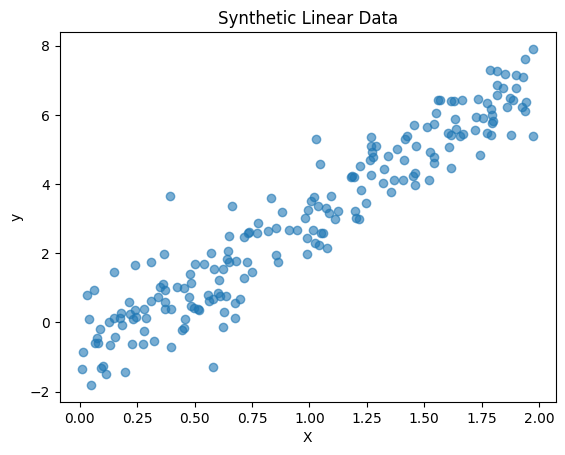

In [2]:
# 1.1 Generate synthetic linear data
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 200
X_lin = 2 * np.random.rand(n_samples, 1)
true_slope = 4.0
true_intercept = -1.0
noise = np.random.randn(n_samples, 1) * 0.8
y_lin = true_slope * X_lin + true_intercept + noise

# Reshape for consistency
X_lin = X_lin.reshape(-1, 1)
y_lin = y_lin.reshape(-1, 1)

# Optional: visualize
plt.scatter(X_lin, y_lin, alpha=0.6)
plt.title('Synthetic Linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

### 1.2 Implement Linear Regression from Scratch

Complete the **TODO** sections below to implement a `LinearRegressionGD` class using gradient descent. Use **Mean Squared Error (MSE)** as the loss and update the weights and bias accordingly.

Recall:
- Loss: $$J(w, b) = \frac{1}{n}\sum_{i=1}^n (y_i - (w x_i + b))^2$$
- Gradient w.r.t. weight: $$\frac{\partial J}{\partial w} = -\frac{2}{n} \sum_{i=1}^n x_i (y_i - (w x_i + b))$$
- Gradient w.r.t. bias: $$\frac{\partial J}{\partial b} = -\frac{2}{n} \sum_{i=1}^n (y_i - (w x_i + b))$$


In [3]:
# 1.2 Linear Regression (Gradient Descent)
class LinearRegressionGD:
    def __init__(self, lr=0.05, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weight = None  # shape: (n_features, 1)
        self.bias = None

    def fit(self, X, y):
        """
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples, 1)
        """
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weight = np.zeros((n_features, 1))
        self.bias = 0.0

        # Gradient descent loop
        for i in range(self.n_iters):
            y_pred = self.weight * X + self.bias

            dw = (-2 / n_samples) * (X * (y - y_pred))
            db = (-2 / n_samples) * (y - y_pred)

            self.weight = self.weight - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict(self, X):
        """
        X: numpy array of shape (n_samples, n_features)
        returns: predictions of shape (n_samples, 1)
        """
        y_pred = self.weight * X + self.bias
        return y_pred  # Replace with prediction

### 1.3 Train and Evaluate your Linear Regression Model

1. Instantiate the `LinearRegressionGD` class and call `fit` on `(X_lin, y_lin)`.
2. Use `predict` to obtain predictions on the training set.
3. Implement functions to compute **Mean Squared Error (MSE)** and **R² Score**:

- $$\text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2$$
- $$R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$$

Fill in the TODO parts below.


In [4]:
# 1.3 Train and Evaluate
# Instantiate and train
model_lin = LinearRegressionGD(lr=0.05, n_iters=2000)
model_lin.fit(X_lin, y_lin)
y_pred_lin = model_lin.predict(X_lin)


def mean_squared_error(y_true, y_pred):
    # y_true, y_pred: shape (n_samples, 1)
    mse = np.mean((y_true - y_pred) ** 2)
    return mse  # Replace with MSE computation


def r2_score(y_true, y_pred):
    # y_true, y_pred: shape (n_samples, 1)
    R2 = 1 - (np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2))
    return R2  # Replace with R2 computation


# Compute and print metrics
mse_value = mean_squared_error(y_lin, y_pred_lin)
r2_value = r2_score(y_lin, y_pred_lin)
print(f"Linear Regression MSE: {mse_value}")
print(f"Linear Regression R^2: {r2_value}")

Linear Regression MSE: 0.09876442791809258
Linear Regression R^2: 0.9836731248772131


## 2. Logistic Regression

**Objective:** Implement binary logistic regression using gradient descent on a synthetic dataset. Evaluate using accuracy, precision, recall, and plot the decision boundary.

### 2.1 Generate Synthetic Binary Classification Data

We will generate two Gaussian blobs for classes 0 and 1.


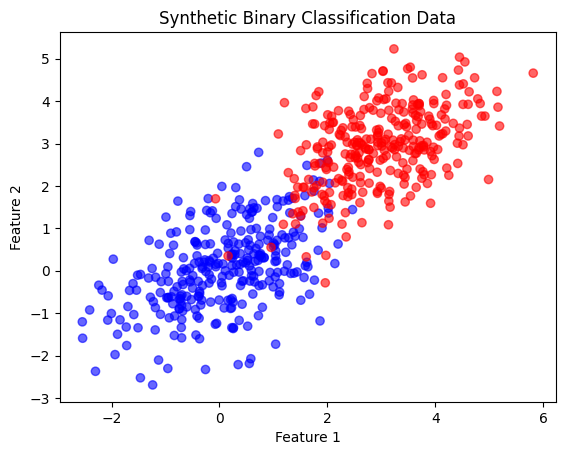

In [5]:
# 2.1 Generate synthetic data for logistic regression
np.random.seed(0)
num_obs = 300
mean0 = [0, 0]
cov0 = [[1, 0.5], [0.5, 1]]
mean1 = [3, 3]
cov1 = [[1, 0.5], [0.5, 1]]

x0 = np.random.multivariate_normal(mean0, cov0, num_obs)
x1 = np.random.multivariate_normal(mean1, cov1, num_obs)

X_log = np.vstack((x0, x1))  # shape: (2*num_obs, 2)
y_log = np.hstack((np.zeros(num_obs), np.ones(num_obs)))  # shape: (2*num_obs,)

# Optional: visualize the data
import matplotlib.pyplot as plt

plt.scatter(X_log[:, 0], X_log[:, 1], c=y_log, cmap='bwr', alpha=0.6)
plt.title('Synthetic Binary Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 2.2 Implement Logistic Regression from Scratch

Complete the **TODO** sections below to implement a `LogisticRegressionGD` class. Use the **sigmoid** function and **Binary Cross-Entropy** loss:

- Sigmoid: $$\sigma(z) = \frac{1}{1 + e^{-z}}$$
- Loss: $$J(w, b) = -\frac{1}{n} \sum_{i=1}^n [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$$
- Gradients:
  - $$\frac{\partial J}{\partial w} = \frac{1}{n} X^T (\hat{y} - y)$$
  - $$\frac{\partial J}{\partial b} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)$$


In [6]:
# 2.2 Logistic Regression (Gradient Descent)
class LogisticRegressionGD:
    def __init__(self, lr=0.1, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None  # shape: (n_features,)
        self.bias = None  # scalar

    def sigmoid(self, z):
        s = 1 / (1 + np.exp(-z))
        return s

    def fit(self, X, y):
        """
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples,)
        """
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        for i in range(self.n_iters):
            linear_model = X.dot(self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            dw = (1 / n_samples) * X.T.dot(y_predicted - y)
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        probability = self.sigmoid(linear_model)
        return probability

    def predict(self, X):
        """
        Return class labels 0 or 1
        """
        proba = self.predict_proba(X)
        return (proba > 0.5).astype(int)

### 2.3 Train, Evaluate, and Visualize Logistic Regression

1. Instantiate your `LogisticRegressionGD` class and train on `(X_log, y_log)`.
2. Get predictions and probabilities on the training set.
3. Implement functions for **Accuracy**, **Precision**, and **Recall**:
   - $$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{Total}}$$
   - $$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$
   - $$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

4. Plot the decision boundary (optional): For a meshgrid of points, compute `predict` and color regions.


Logistic Regression Accuracy: 0.955
Logistic Regression Precision: 0.9504950495049505
Logistic Regression Recall: 0.96


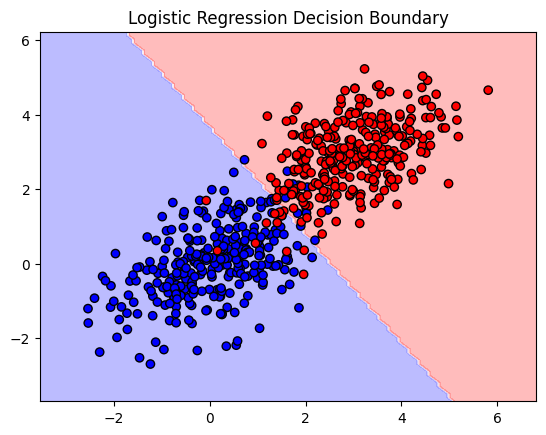

In [7]:
# 2.3 Train and Evaluate
model_log = LogisticRegressionGD(lr=0.1, n_iters=2000)
model_log.fit(X_log, y_log)
y_proba = model_log.predict_proba(X_log)
y_pred_log = model_log.predict(X_log)


def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred)


def precision_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0


def recall_score(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0


# Compute and print metrics
acc_log = accuracy_score(y_log, y_pred_log)
prec_log = precision_score(y_log, y_pred_log)
rec_log = recall_score(y_log, y_pred_log)
print(f"Logistic Regression Accuracy: {acc_log}")
print(f"Logistic Regression Precision: {prec_log}")
print(f"Logistic Regression Recall: {rec_log}")

# Optional: Plot decision boundary
import matplotlib.pyplot as plt

x_min, x_max = X_log[:, 0].min() - 1, X_log[:, 0].max() + 1
y_min, y_max = X_log[:, 1].min() - 1, X_log[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_pred = model_log.predict(grid)
grid_pred = grid_pred.reshape(xx.shape) if grid_pred is not None else np.zeros_like(xx)
plt.contourf(xx, yy, grid_pred, alpha=0.3, cmap='bwr')
plt.scatter(X_log[:, 0], X_log[:, 1], c=y_log, cmap='bwr', edgecolors='k')
plt.title('Logistic Regression Decision Boundary')
plt.show()

## 3. Decision Tree Classifier

**Objective:** Implement a binary decision tree classifier using **Gini impurity** for splits. Train and evaluate on a synthetic dataset.

### 3.1 Generate Synthetic Data for Decision Tree

We will generate a 2D dataset with non-linear separation to illustrate decision tree capabilities.


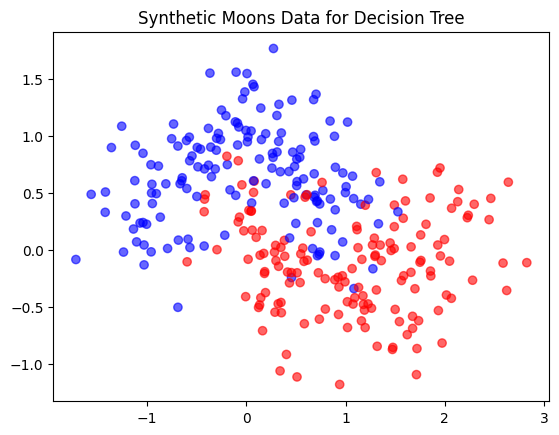

In [8]:
# 4.1 Generate synthetic data for decision tree
from sklearn.datasets import make_moons
import numpy as np

# Note: using sklearn to generate data only, modeling should be from scratch
X_dt, y_dt = make_moons(n_samples=300, noise=0.3, random_state=42)

# Optional: visualize
import matplotlib.pyplot as plt

plt.scatter(X_dt[:, 0], X_dt[:, 1], c=y_dt, cmap='bwr', alpha=0.6)
plt.title('Synthetic Moons Data for Decision Tree')
plt.show()

### 3.2 Implement Decision Tree from Scratch

Complete the **TODO** sections to build a binary decision tree using **Gini impurity**.

Gini impurity for a node: $$G = 1 - \sum_{c} p_c^2$$
where $p_c$ is the proportion of class $c$ instances in the node.

**Steps:**
1. For each feature, consider all possible split thresholds (e.g., unique feature values).
2. Compute Gini impurity of left and right child nodes.
3. Select feature and threshold that minimize the weighted average Gini.
4. Recursively build subtrees until a stopping condition (e.g., max depth or pure node).


In [16]:
# 3.2 Decision Tree Classifier
class DecisionTree:
    def __init__(self, max_depth=5, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    class Node:
        def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
            self.feature_index = feature_index
            self.threshold = threshold
            self.left = left
            self.right = right
            self.value = value  # for leaf node

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # Stopping conditions
        if (depth >= self.max_depth) or (n_labels == 1) or (n_samples < self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return self.Node(value=leaf_value)

        best_feature, best_thresh = None, None
        best_gain = -1
        parent_gini = self._gini(y)

        # For each feature
        for feature_index in range(n_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                left_idxs = np.where(X[:, feature_index] <= threshold)[0]
                right_idxs = np.where(X[:, feature_index] > threshold)[0]

                n_left, n_right = len(left_idxs), len(right_idxs)
                gini_left = self._gini(y[left_idxs])
                gini_right = self._gini(y[right_idxs])
                gini = (n_left * gini_left + n_right * gini_right) / n_samples
                gain = parent_gini - gini
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_index
                    best_thresh = threshold

        X_left, y_left = X[X[:, best_feature] <= best_thresh] , y[X[:, best_feature] <= best_thresh]
        X_right, y_right = X[X[:, best_feature] > best_thresh] , y[X[:, best_feature] > best_thresh]
        # Recursively build left and right subtrees
        left_subtree = self._build_tree(X_left, y_left, depth + 1)
        right_subtree = self._build_tree(X_right, y_right, depth + 1)
        return self.Node(feature_index=best_feature, threshold=best_thresh, left=left_subtree, right=right_subtree)

    def _gini(self, y):
        """
        Compute Gini impurity for labels y
        """
        m = len(y)
        if m == 0:
            return 0
        counts = np.bincount(y)
        probs = counts / m
        return 1 - np.sum(probs ** 2)

    def _most_common_label(self, y):
        """
        Return the most common label in y without using Counter
        """
        counts = {}
        for label in y:
            if label in counts:
                counts[label] += 1
            else:
                counts[label] = 1

        most_common = None
        max_count = -1
        for label, count in counts.items():
            if count > max_count:
                max_count = count
                most_common = label

        return most_common


    def predict(self, X):
        """
        Predict class labels for samples in X
        """
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _traverse_tree(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_index] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


### 3.3 Train and Evaluate Decision Tree

1. Split `(X_dt, y_dt)` into a training and test set (e.g., 80/20 split).
2. Instantiate `DecisionTree`, call `fit` on the training set.
3. Get predictions on both train and test sets.
4. Compute **Accuracy** and **Confusion Matrix** (reuse your functions or reimplement).


In [17]:
# 3.3 Train & Evaluate Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size=0.2, random_state=42)

dt_model = DecisionTree(max_depth=4)
dt_model.fit(X_train_dt, y_train_dt)

y_pred_train = dt_model.predict(X_train_dt)
y_pred_test = dt_model.predict(X_test_dt)


acc_train_dt = accuracy_score(y_train_dt, y_pred_train)
acc_test_dt = accuracy_score(y_test_dt, y_pred_test)

conf_train_dt = confusion_matrix(y_train_dt, y_pred_train)
conf_test_dt = confusion_matrix(y_test_dt, y_pred_test)

print(f"Decision Tree Train Accuracy: {acc_train_dt}")
print(f"Decision Tree Test Accuracy: {acc_test_dt}")
print(f"Decision Tree Train Confusion Matrix:\n{conf_train_dt}")
print(f"Decision Tree Test Confusion Matrix:\n{conf_test_dt}")


Decision Tree Train Accuracy: 0.9166666666666666
Decision Tree Test Accuracy: 0.85
Decision Tree Train Confusion Matrix:
[[113  11]
 [  9 107]]
Decision Tree Test Confusion Matrix:
[[20  6]
 [ 3 31]]


Good luck and happy coding!

In [20]:
import numpy as np

def confusion_matrix_custom(y_true, y_pred):
    """
    Compute confusion matrix from true and predicted labels
    """
    classes = np.unique(np.concatenate((y_true, y_pred)))
    n_classes = len(classes)

    class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

    cm = np.zeros((n_classes, n_classes), dtype=int)

    for true, pred in zip(y_true, y_pred):
        i = class_to_idx[true]
        j = class_to_idx[pred]
        cm[i, j] += 1
    return cm, classes  # برگرداندن کلاس‌ها هم برای برچسب زدن راحت‌تر



y_true = [0, 1, 2, 1, 0, 2, 2]
y_pred = [0, 2, 2, 1, 0, 0, 2]

cm, classes = confusion_matrix_custom(y_true, y_pred)
print("Classes:", classes)
print("Confusion Matrix:\n", cm)


Classes: [0 1 2]
Confusion Matrix:
 [[2 0 0]
 [0 1 1]
 [1 0 2]]
